In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def adjust_data(d, L):
    r, c = d.shape    
    new_points = np.linspace(0, r-1, L)
    res = np.empty((L, c))
    res[0, :] = d[0, :]
    res[L-1, :] = d[-1, :]
    
    j = 0    
    for i in range(1, L-1):
        ix = new_points[i]        
        while not (j <= ix < j+1):
            j=j+1
            continue
        
        f = (ix-j)
        res[i, :] = (1-f)*d[j] + f*d[j+1]
    
    return res

In [38]:
def get_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    d= []
    for line in lines:        
        tokens = line.rstrip().split(',')        
        if len(tokens)<6:
            continue
        t = int(tokens[0])
        sensor = int(tokens[1])
        x = float(tokens[3])
        y = float(tokens[4])
        z = float(tokens[5])
        d.append([t, sensor, x, y, z])
    
    d = np.array(d)
    d[:, 0 ] = (d[:, 0] - d[0, 0])/1e9    
    return d    

In [39]:
#Apple Bite
d1 = get_data('C:/Users/mm5gg/Box Sync/MyData/quaternion example data/apple_bite_data/1.wada')
d2 = get_data('C:/Users/mm5gg/Box Sync/MyData/quaternion example data/apple_bite_data/2.wada')


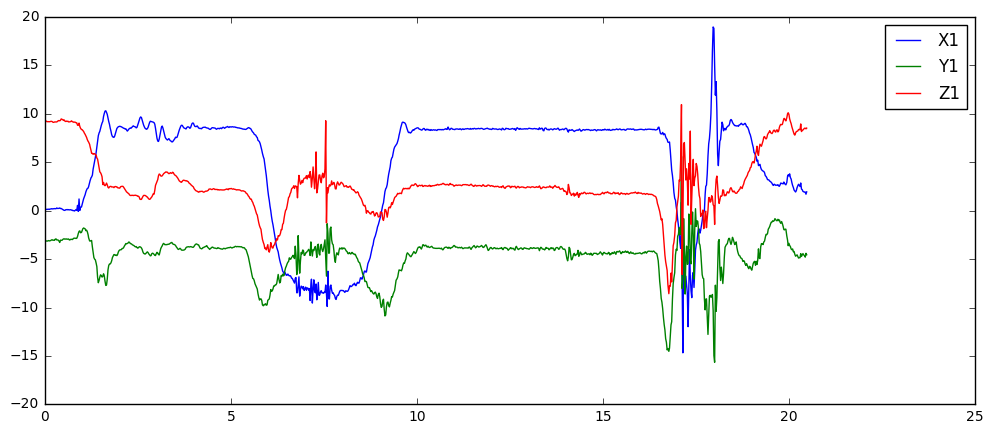

In [40]:
d = d1
d = d[d[:, 1]==1, :]
fig = plt.figure(figsize=(12,5))
subplot = fig.add_subplot(111)        
subplot.plot(d[:, 0], d[:, 2], label='X1')
subplot.plot(d[:, 0], d[:, 3], label='Y1')
subplot.plot(d[:, 0], d[:, 4], label='Z1')

subplot.legend()
plt.show()



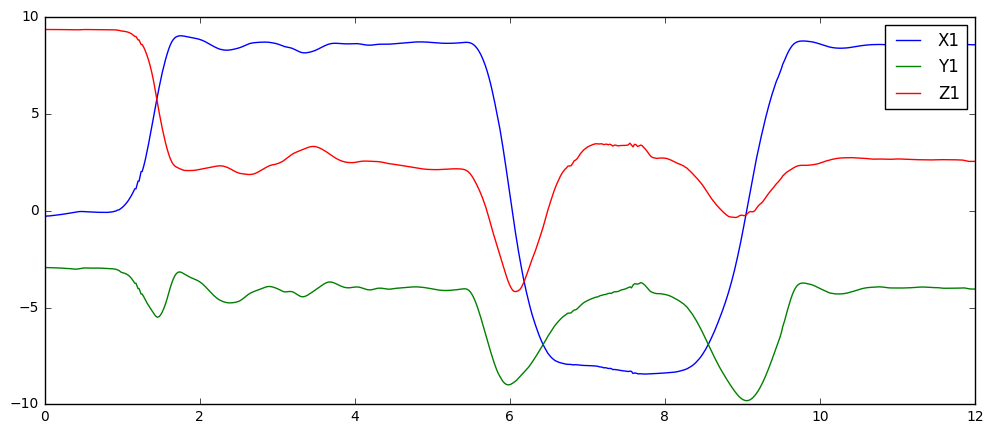

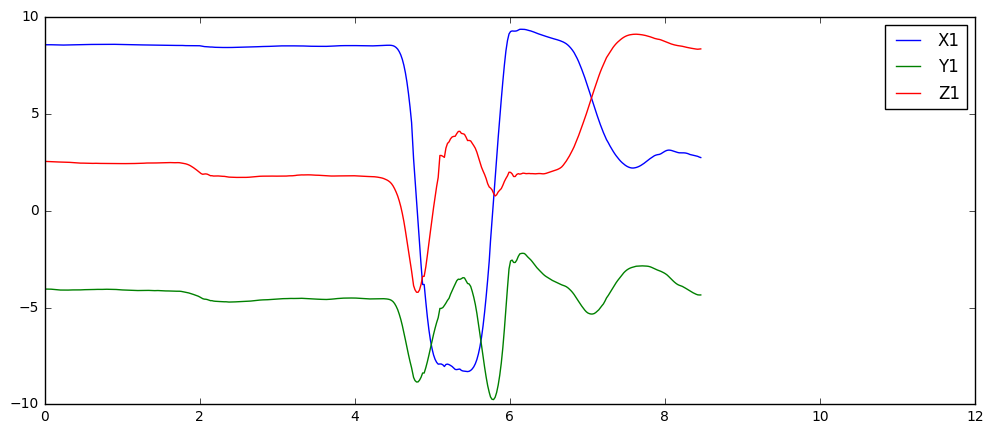

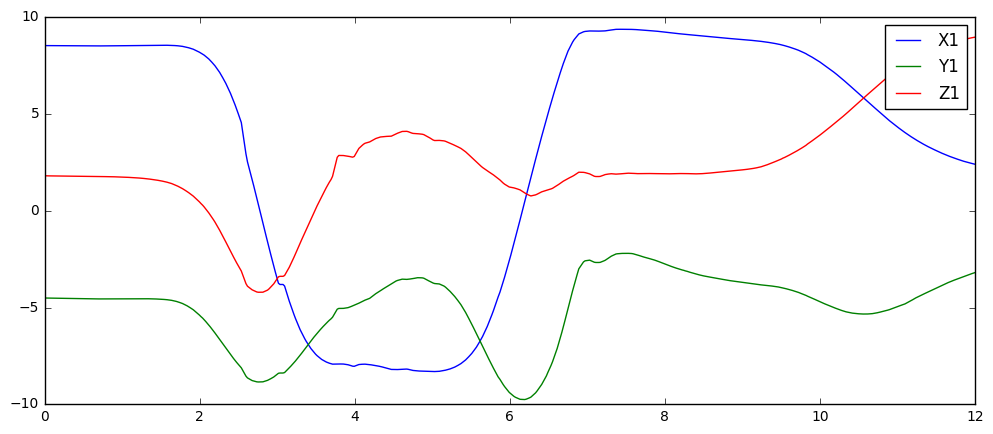

In [52]:
d = d1
d = d[(d[:, 1]==9) & (d[:, 0]<12), :]
g1=d
fig = plt.figure(figsize=(12,5))
subplot = fig.add_subplot(111)        
subplot.plot(d[:, 0], d[:, 2], label='X1')
subplot.plot(d[:, 0], d[:, 3], label='Y1')
subplot.plot(d[:, 0], d[:, 4], label='Z1')
plt.xlim([0, 12])
subplot.legend()
plt.show()

d = d1
d = d[(d[:, 1]==9) & (d[:, 0]>=12), :]
d[:, 0] = d[:, 0]- d[0, 0]
g2 = d
fig = plt.figure(figsize=(12,5))
subplot = fig.add_subplot(111)        
subplot.plot(d[:, 0], d[:, 2], label='X1')
subplot.plot(d[:, 0], d[:, 3], label='Y1')
subplot.plot(d[:, 0], d[:, 4], label='Z1')
plt.xlim([0, 12])
subplot.legend()
plt.show()

d = adjust_data(g2[200:-50, 2:], g1.shape[0])
d = np.concatenate((g1[:, :2], d), axis = 1)

fig = plt.figure(figsize=(12,5))
subplot = fig.add_subplot(111)        
subplot.plot(d[:, 0], d[:, 2], label='X1')
subplot.plot(d[:, 0], d[:, 3], label='Y1')
subplot.plot(d[:, 0], d[:, 4], label='Z1')
plt.xlim([0, 12])
subplot.legend()
plt.show()



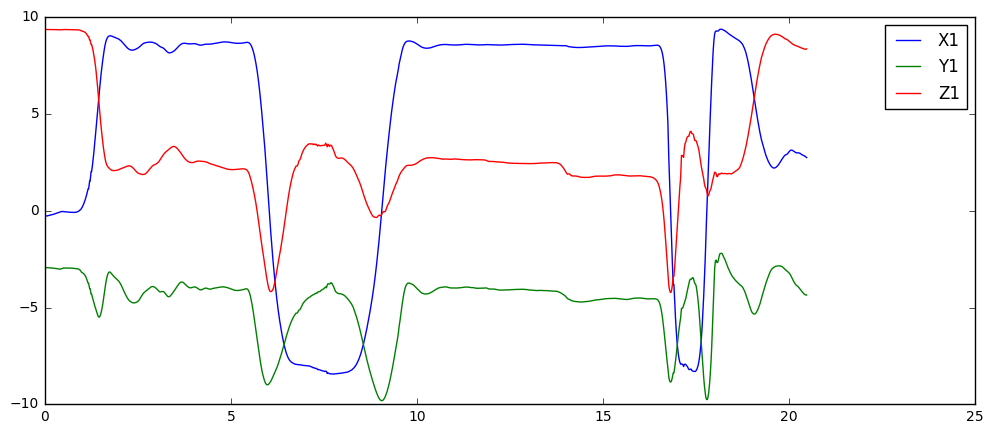

In [46]:
d = d1
d = d[d[:, 1]==9, :]
l = d.shape[0]

fig = plt.figure(figsize=(12,5))
subplot = fig.add_subplot(111)        
subplot.plot(d[:, 0], d[:, 2], label='X1')
subplot.plot(d[:, 0], d[:, 3], label='Y1')
subplot.plot(d[:, 0], d[:, 4], label='Z1')

subplot.legend()
plt.show()